# Flight price prediction model

## Instructions:
1. you will have a datset.
2. Find the cheapest and expenses flight at a specifics time.
3. You have to go through EDA
4. ML Model
5. Find a sweet spot for a cheap ticket.

* Ahmed is a customer of Sastaticket.pk. He is planning to fly from Karachi to Islamabad for his brother's wedding and is currently i the process of choosing tickets. Ahmed has to go to Islamabad but Ahmed also wants to svae some money in the process, so he chooses to wait instead of buy now, simply beacuse ticket prices are just too high.
* Is this the right decision? Won't ticket increase in the future? Perhaps there is a sweet-spot Ahmed is hoping to find and mayber he just might find it. This is the problem that you will be tackling in the competition.
* Can you predict future prices accurately tosucha degree that you can now tell Ahmed - with confidence - that he has made the wrong decision. Your task boils down to generating optimal predictions for flight prices of multiple airlines. If successfull, your model will contribute greatly to Sastaticket's rich and diverse set of operating algorithms.   

# 1. Exploratory Data Analysis:
we will ectract information from our data

In [80]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [81]:
# df = df.sample(5000) #trick to make sample dataset

In [82]:
from urllib.request import urlretrieve
urlretrieve("https://raw.githubusercontent.com/AammarTufail/machinelearning_ka_chilla/master/Sastaticket_datasets/sastaticket_test.csv", "sastaticket_test.csv")

('sastaticket_test.csv', <http.client.HTTPMessage at 0x1812ead7880>)

In [83]:
from urllib.request import urlretrieve
urlretrieve("https://raw.githubusercontent.com/AammarTufail/machinelearning_ka_chilla/master/Sastaticket_datasets/sastaticket_train.csv", "sastaticket_train.csv")

('sastaticket_train.csv', <http.client.HTTPMessage at 0x1812ead7a60>)

In [84]:
# saving a csv file for training dataset
df = pd.read_csv('resources/sastaticket_train.csv')
df.head()

,Unnamed: 0.2,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.1,target
0,276919,276919,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0
1,12092463,12092463,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0
2,11061788,11061788,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0
3,8799808,8799808,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0
4,16391150,16391150,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0


In [85]:
df_test = pd.read_csv('resources/sastaticket_test.csv')
df_test.head()
# this will give me a chance to look your assignments 

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,2694449,2021-09-16 12:20:01.578279+00:00,x,y,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1,d-1
1,3088556,2021-09-18 20:13:13.612131+00:00,x,y,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1,d-5
2,3914899,2021-09-24 17:53:41.424953+00:00,x,y,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1,a-9
3,1139859,2021-09-07 19:39:07.182848+00:00,x,y,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0,b-1
4,594648,2021-09-05 03:48:20.099555+00:00,x,y,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1,a-1


In [86]:
# EDA analysis
print("Column, Rows", df.shape)

Column, Rows (5000, 14)


In [87]:
# structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.2  5000 non-null   int64  
 1   Unnamed: 0    5000 non-null   int64  
 2   f1            5000 non-null   object 
 3   f2            5000 non-null   object 
 4   f3            5000 non-null   object 
 5   f4            5000 non-null   object 
 6   f5            5000 non-null   object 
 7   f6            5000 non-null   object 
 8   f7            5000 non-null   bool   
 9   f8            5000 non-null   float64
 10  f9            5000 non-null   int64  
 11  f10           5000 non-null   object 
 12  Unnamed: 0.1  5000 non-null   int64  
 13  target        5000 non-null   float64
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 512.8+ KB


In [88]:
# check nul values
df.isnull().sum()

Unnamed: 0.2    0
Unnamed: 0      0
f1              0
f2              0
f3              0
f4              0
f5              0
f6              0
f7              0
f8              0
f9              0
f10             0
Unnamed: 0.1    0
target          0
dtype: int64

In [89]:
# summary stats
df.describe()

,Unnamed: 0.2,Unnamed: 0,f8,f9,Unnamed: 0.1,target
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,1.086293e+07,1.086293e+07,22.494400,0.944600,1.086293e+07,10104.351800
std,6.275456e+06,6.275456e+06,8.887101,0.607951,6.275456e+06,3359.936118
min,2.499000e+03,2.499000e+03,0.000000,0.000000,2.499000e+03,4990.000000
25%,5.417290e+06,5.417290e+06,20.000000,1.000000,5.417290e+06,7796.000000
50%,1.093803e+07,1.093803e+07,20.000000,1.000000,1.093803e+07,9403.000000
75%,1.621582e+07,1.621582e+07,32.000000,1.000000,1.621582e+07,11245.000000
max,2.177443e+07,2.177443e+07,45.000000,2.000000,2.177443e+07,33720.000000


In [90]:
df.head()

,Unnamed: 0.2,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.1,target
0,276919,276919,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0
1,12092463,12092463,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0
2,11061788,11061788,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0
3,8799808,8799808,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0
4,16391150,16391150,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0


In [91]:
print(df.columns)

Index(['Unnamed: 0.2', 'Unnamed: 0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7',
       'f8', 'f9', 'f10', 'Unnamed: 0.1', 'target'],
      dtype='object')


In [92]:
# Feature Engineering
#Finding unique values in categorical lists
cat_list = ['f2', 'f3', 'f6', 'f8', 'f9', 'f10']

#unique value in each column
for i in cat_list:
    print(i, df[i].unique())
    print('........................................') #seprater line

f2 ['x']
........................................
f3 ['y']
........................................
f6 ['gamma' 'alpha' 'beta' 'omega']
........................................
f8 [ 0. 35. 20. 15. 32. 40. 45.]
........................................
f9 [0 1 2]
........................................
f10 ['c-2' 'a-9' 'c-4' 'a-23' 'b-1' 'a-5' 'b-9' 'a-7' 'd-1' 'c-6' 'a-1' 'd-5'
 'b-69' 'b-19' 'd-3' 'b-319' 'b-369' 'b-67' 'b-73']
........................................


- We will remove these two columns f2['x'], f3['y'] because they dont have any multiple unique values
will remove 'f10'its flight no.. 

In [93]:
df.drop(['Unnamed: 0', 'f2', 'f3'], axis=1, inplace=True)

In [94]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0.2'], axis=1, inplace=True)

In [95]:
df.head()

,f1,f4,f5,f6,f7,f8,f9,f10,target
0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,7400.0
1,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,15377.0
2,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,6900.0
3,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,9707.0
4,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,6500.0


In [96]:
# type casting 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      5000 non-null   object 
 1   f4      5000 non-null   object 
 2   f5      5000 non-null   object 
 3   f6      5000 non-null   object 
 4   f7      5000 non-null   bool   
 5   f8      5000 non-null   float64
 6   f9      5000 non-null   int64  
 7   f10     5000 non-null   object 
 8   target  5000 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 317.5+ KB


In [97]:
# convert them into dateandtime objects
from datetime import date,datetime
df['f1'] = pd.to_datetime(df['f1'])
df['f4'] = pd.to_datetime(df['f4'])
df['f5'] = pd.to_datetime(df['f5'])

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   f1      5000 non-null   datetime64[ns, UTC]
 1   f4      5000 non-null   datetime64[ns, UTC]
 2   f5      5000 non-null   datetime64[ns, UTC]
 3   f6      5000 non-null   object             
 4   f7      5000 non-null   bool               
 5   f8      5000 non-null   float64            
 6   f9      5000 non-null   int64              
 7   f10     5000 non-null   object             
 8   target  5000 non-null   float64            
dtypes: bool(1), datetime64[ns, UTC](3), float64(2), int64(1), object(2)
memory usage: 317.5+ KB


In [99]:
# adding columns after substraction
df.insert(0, "time_to_dep", ((df['f4']-df['f1']).astype('timedelta64[s]')), True)
df.insert(1, "travel_time(s)", ((df['f5']-df['f4']).astype('timedelta64[s]')), True)

In [100]:
df.head()

,time_to_dep,travel_time(s),f1,f4,f5,f6,f7,f8,f9,f10,target
0,1268192.0,7200.0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,7400.0
1,29688.0,7200.0,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,15377.0
2,3033072.0,7200.0,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,6900.0
3,363011.0,7200.0,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,9707.0
4,2142368.0,6900.0,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,6500.0


In [101]:
df.isnull().sum()

time_to_dep       0
travel_time(s)    0
f1                0
f4                0
f5                0
f6                0
f7                0
f8                0
f9                0
f10               0
target            0
dtype: int64

In [102]:
df = df.rename(columns={'f12' : 'f1'})

In [103]:
df.head()

,time_to_dep,travel_time(s),f1,f4,f5,f6,f7,f8,f9,f10,target
0,1268192.0,7200.0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,7400.0
1,29688.0,7200.0,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,15377.0
2,3033072.0,7200.0,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,6900.0
3,363011.0,7200.0,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,9707.0
4,2142368.0,6900.0,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,6500.0


In [123]:
cat_cols = ['f6', 'f7','f8','f9']
num_cols = ['time_to_dep(s)', 'travel_time(s)']

C:\Users\Faiza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Faiza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Faiza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

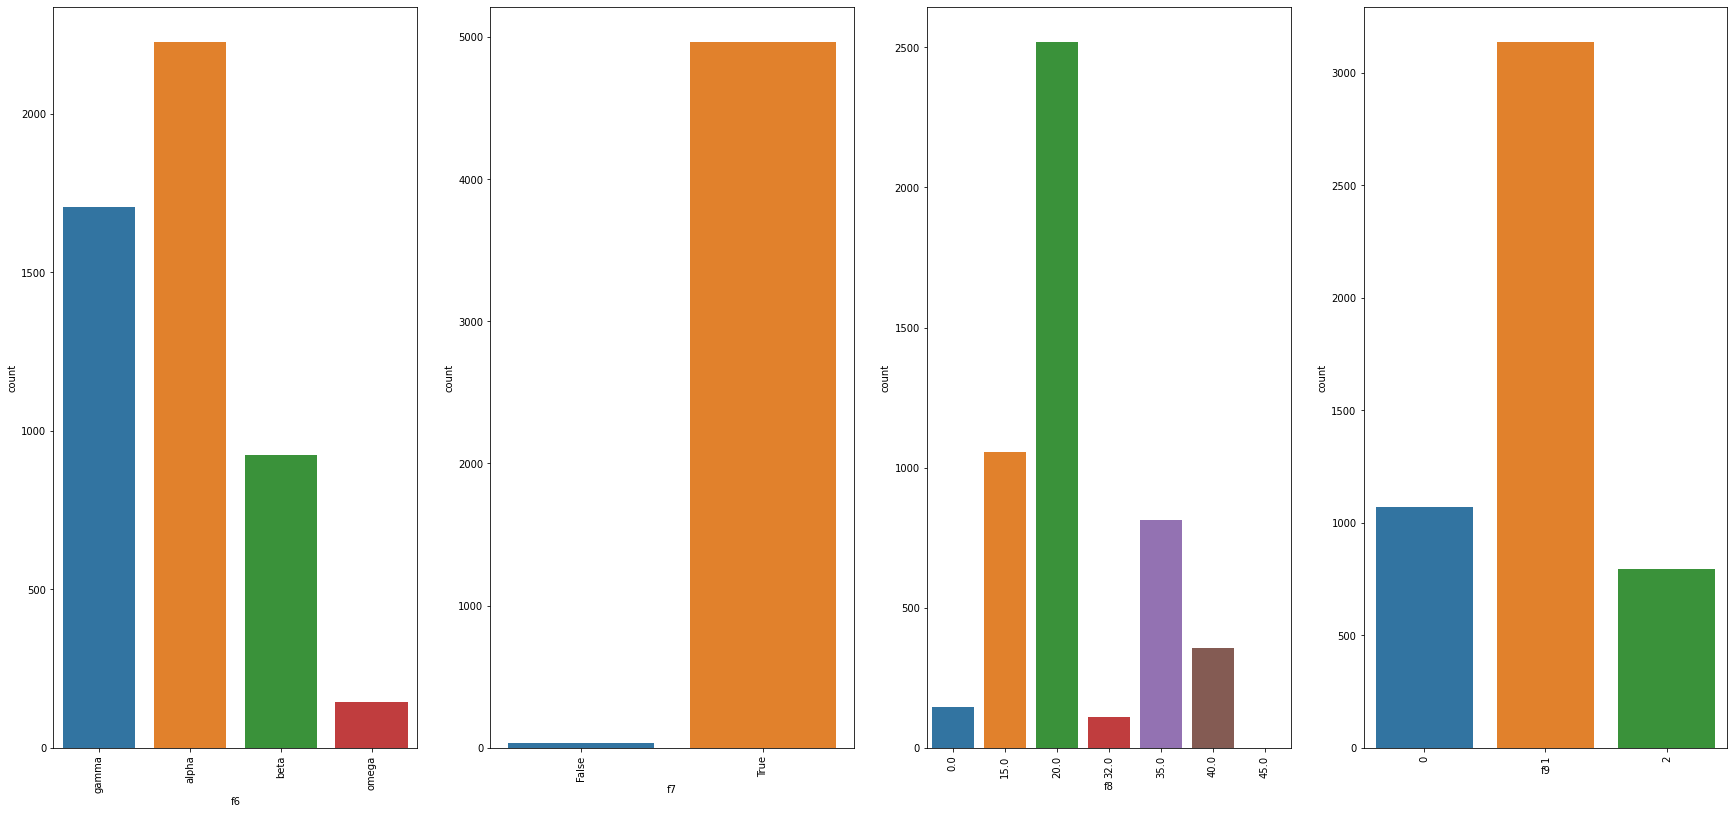

In [124]:
# Plotting categorical count plot
c=1
plt.figure(figsize= (30, 30))
for i in cat_cols:
    plt.subplot(2,4,c)
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    c= c+1
plt.show()

In [127]:
# # Plotting numerical count plot
# c=1
# plt.figure(figsize= (10, 30))
# for i in num_cols:
#     plt.subplot(6,3,c)
#     sns.distplot(df[i])
#     c= c+1
# plt.show()

C:\Users\Faiza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

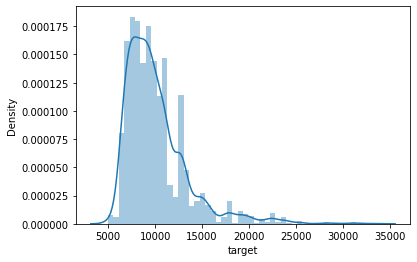

In [128]:
# target 
sns.distplot(df['target'])

C:\Users\Faiza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

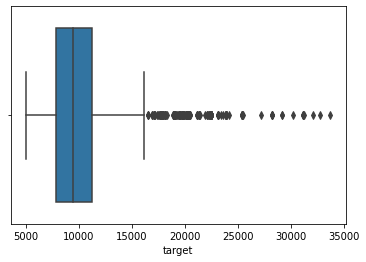

In [130]:
sns.boxplot(df['target'])

In [131]:
# out liers removal # task